# Fase 2: Data Understanding

##1. Carga de datos y librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

import os
ruta = "/content/drive/MyDrive/Machine_learning/archivos_parquet"

# Cargar datasets
winter = pd.read_parquet(os.path.join(ruta, "winter.parquet"))
summer = pd.read_parquet(os.path.join(ruta, "summer.parquet"))
dictionary = pd.read_parquet(os.path.join(ruta, "dictionary.parquet"))

print("Winter dataset:")
display(winter.head())

print("Summer dataset:")
display(summer.head())

print("Dictionary dataset:")
display(dictionary.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Winter dataset:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


Summer dataset:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Dictionary dataset:


,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


##2. Exploracion inicial de datos

In [ ]:
print("Dimensiones Winter:", winter.shape)
print("Dimensiones Summer:", summer.shape)
print("Dimensiones Dictionary:", dictionary.shape)

print("\nTipos de datos Winter:")
print(winter.dtypes)

print("\nValores nulos Winter:")
print(winter.isnull().sum())

Dimensiones Winter: (5770, 9)
Dimensiones Summer: (31165, 9)
Dimensiones Dictionary: (201, 4)

Tipos de datos Winter:
Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

Valores nulos Winter:
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64


##3. Analisis de variables categoricas

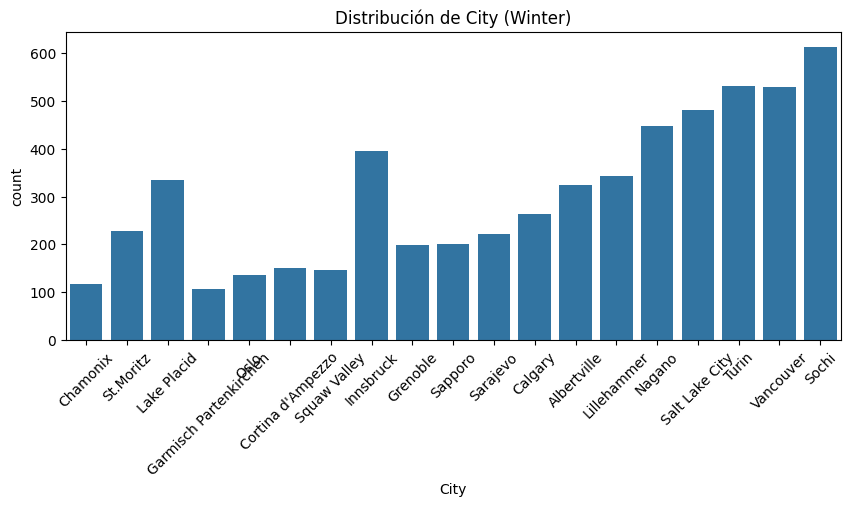

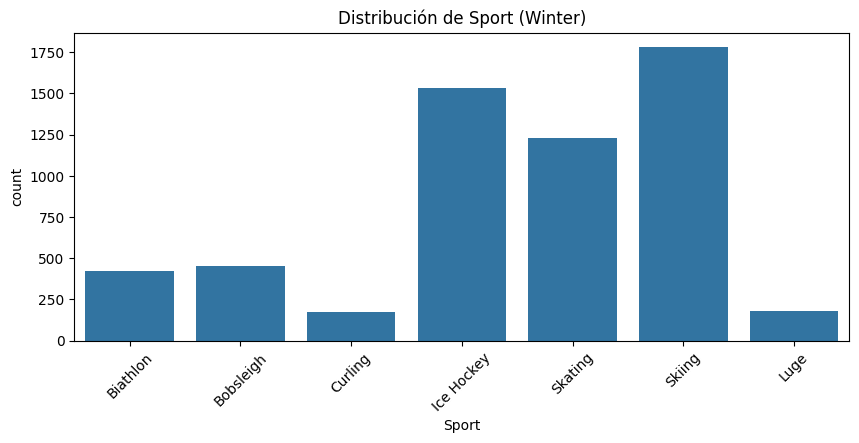

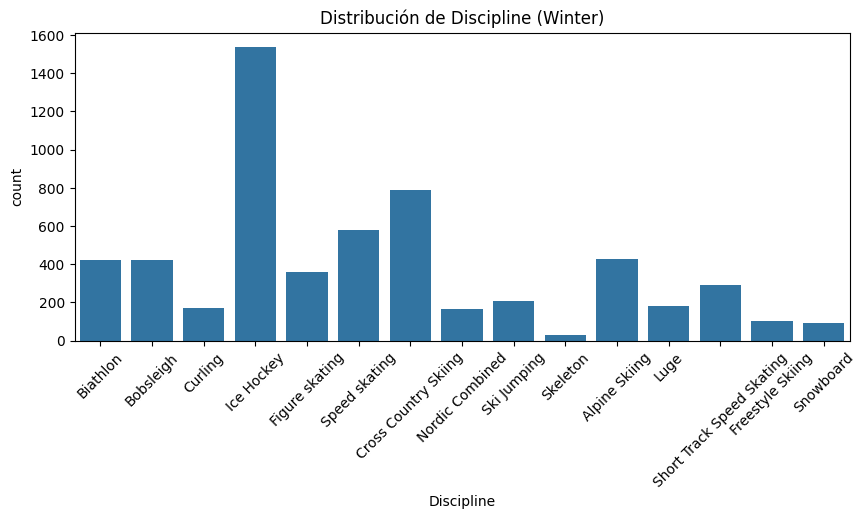

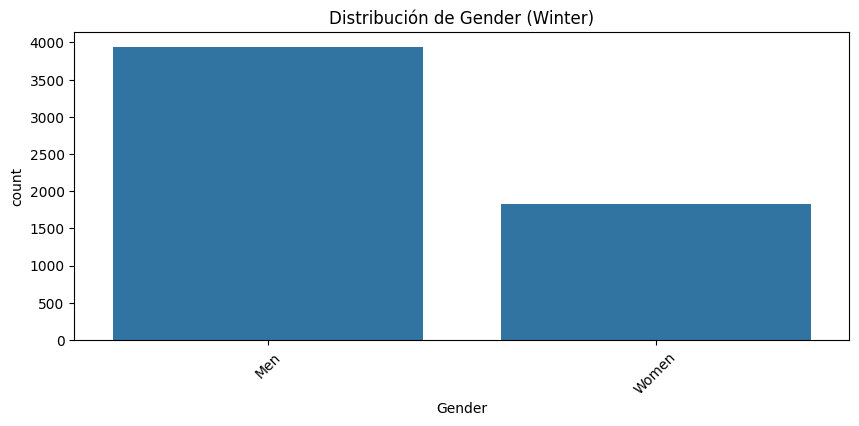

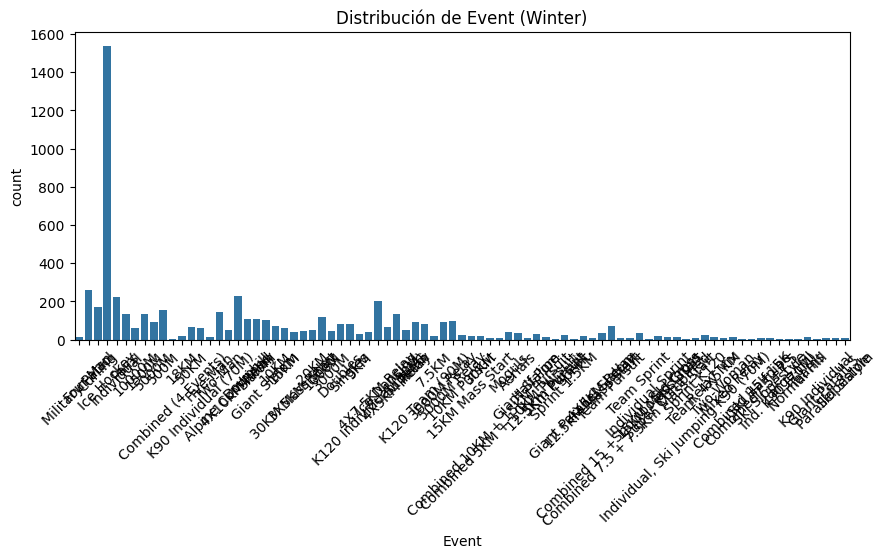

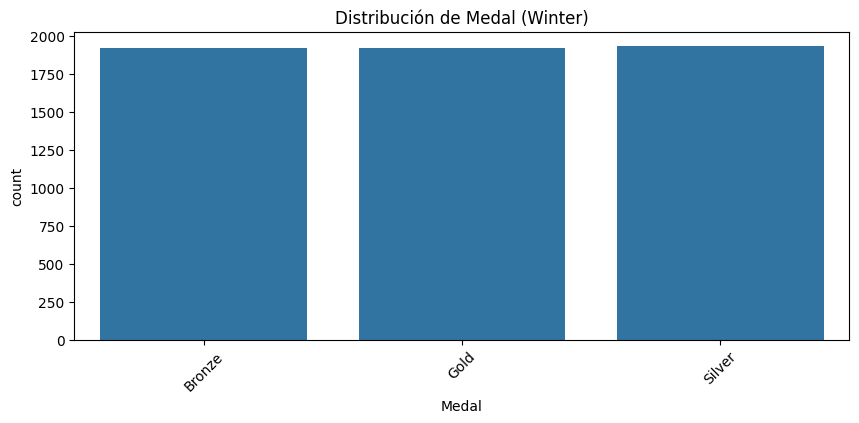

In [ ]:
categorical_cols = ['City', 'Sport', 'Discipline', 'Gender', 'Event', 'Medal']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=winter, x=col)
    plt.title(f'Distribución de {col} (Winter)')
    plt.xticks(rotation=45)
    plt.show()

##4. Analisis de variables numericas

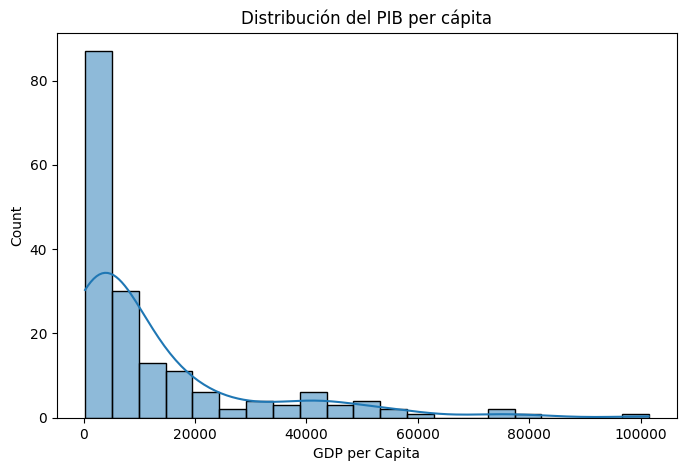

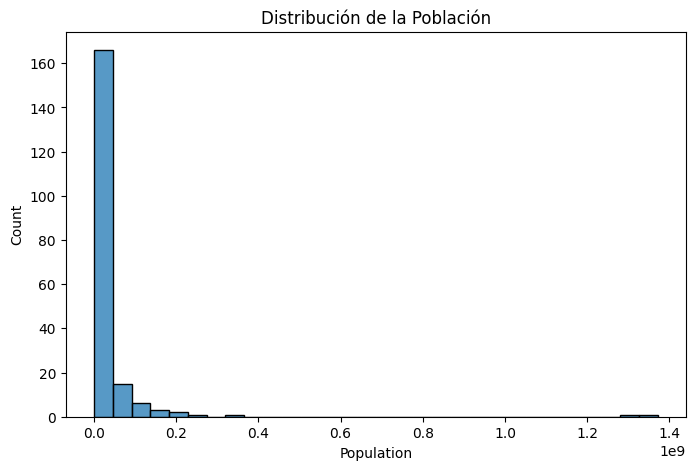

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(dictionary['GDP per Capita'], kde=True)
plt.title("Distribución del PIB per cápita")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(dictionary['Population'], kde=False, bins=30)
plt.title("Distribución de la Población")
plt.show()

##5. Analisis de relacion entre los datasets

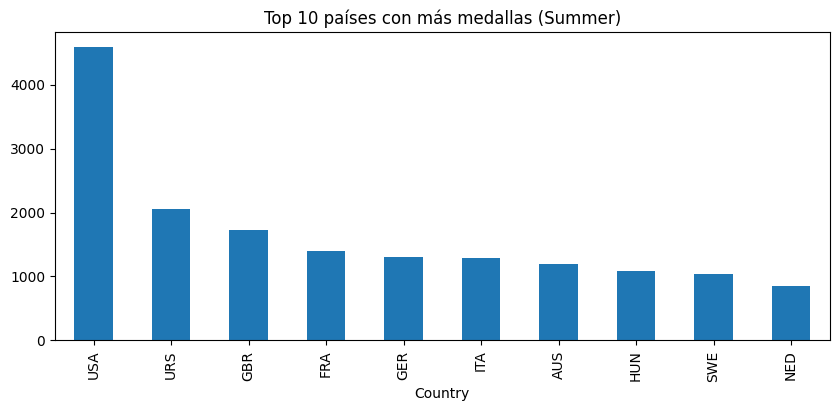

In [ ]:
# Número de medallas por país (Summer)
summer_medals = summer.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)
summer_medals.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 países con más medallas (Summer)")
plt.show()

# Merge con datos socioeconómicos
summer_merged = summer.merge(dictionary, on="Country", how="left")


##6. Analisis de valores faltantes

In [ ]:
print("Valores faltantes Dictionary:")
print(dictionary.isnull().sum())

Valores faltantes Dictionary:
Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64


##7. Conclusiones Fase 2

De los resultados obtenidos en la fase de Data Understanding, podemos extraer las siguientes conclusiones sobre los datos olímpicos y socioeconómicos:

### 1. **Estructura y volumen de los datos:**
- Los datasets de invierno (Winter) y verano (Summer) contienen una cantidad significativa de registros históricos, con múltiples variables como atletas, disciplinas, países y medallas.
- El dataset dictionary incluye información socioeconómica (PIB per cápita y población) por país, esencial para correlacionar el desempeño olímpico con factores económicos y demográficos.

### 2. **Calidad de los datos:**
- Se detectaron valores nulos en variables clave como `Medal`, `Athlete` y `Country`, lo que requiere estrategias de imputación o eliminación para evitar sesgos en el análisis.
- El dataset dictionary presenta missing values en `GDP per Capita` y `Population`, que fueron tratados posteriormente con la mediana para mantener la integridad de los datos.

### 3. **Distribución de variables categóricas:**
- La participación por género muestra un desbalance histórico, con mayor presencia masculina, especialmente en ediciones antiguas.
- Deportes y disciplinas tienen distribuciones desiguales, con algunos siendo más populares o con mayor participación que otros.
- La variable `Medal` tiene una alta proporción de valores nulos, ya que no todos los participantes ganan medallas.

### 4. **Distribución de variables numéricas:**
- El PIB per cápita muestra una distribución sesgada a la derecha, con muchos países con valores bajos y pocos con valores extremadamente altos.
- La población también presenta una distribución muy asimétrica, con unos pocos países muy poblados y muchos con poblaciones pequeñas.

### 5. **Relación entre datasets:**
- Al realizar el merge entre los datos olímpicos y socioeconómicos, se confirma que es posible enriquecer el análisis con variables contextuales por país.
- Países como Estados Unidos, Rusia y Alemania lideran el medallero histórico en los Juegos de Verano, lo que sugiere una posible correlación con poder económico y demográfico.

### 6. **Preparación para modelado:**
- La identificación y tratamiento de missing values y outliers en esta fase sienta las bases para un dataset limpio y consistente.
- La creación de variables derivadas, como `Medal_Won`, facilitará la construcción de modelos predictivos binarios o de regresión.

### 7. **Próximos pasos:**
- Será crucial profundizar en el análisis de correlaciones entre medallas y variables socioeconómicas.
- La normalización de variables numéricas permitirá comparar adecuadamente el impacto del PIB y la población en el desempeño olímpico.
---
En resumen, la Fase 2 permitió comprender la estructura, calidad y relaciones preliminares en los datos, sentando las bases para la limpieza, transformación y modelado predictivo en fases posteriores.